In [125]:
# Compute Ihara Zeta Function 
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import networkx as nx
import networkx.drawing
from sympy import *

In [149]:
# Assuming the graph has no loops and has no double edges
# The function computes directed edge matrix
def Ihara(Graph):
    edges = list(nx.edges(Graph))
    directed_matrix = np.zeros([2*len(edges),2*len(edges)])
    reverse_edges = []
    for i in range(0,len(edges)):
        reverse_edges.append((edges[i][1],edges[i][0]))
    edges.extend(reverse_edges)
    for i,e in enumerate(edges):
        nbr = list(nx.neighbors(Graph,e[1]))
        for n in nbr:
            if n != e[0]:
                for ind,edge in enumerate(edges):
                    if edge == (e[1],n):
                        directed_matrix[i][ind] = 1
    return list(np.round(np.linalg.svd(directed_matrix)[1],decimals = 2)),directed_matrix,list(np.round(np.linalg.eig(directed_matrix)[0],decimals = 2))
def Characteristic_Polynomial_of_Directed_Graph(Graph):
    init_printing()
    M = Ihara(Graph)[1]
    x = symbols('x')
    return det(x*eye(2*len(list(nx.edges(Graph))))-M)
# Sorted by Norm
def Leading_Eigenvalues(Graph,n):
    norm = [(np.round(np.absolute(eig),decimals=2),ind) for ind,eig in enumerate(Ihara(Graph)[2]) ]
    norm = sorted(norm, reverse =1)
    pointer = [norm[i][1] for i in range(0,n)]
    output = [Ihara(Graph)[2][pointer[i]] for i in range(0,n)]
    return output
# For multi-graph we allow for multi-edge and loops. The idea is to add three vertices to each edge.
def Ihara_Multigraph(MGraph):
    new_nodes = list(MGraph.nodes())
    new_edges = list(MGraph.edges())
    for edge in list(MGraph.edges()):
        l = len(new_nodes)
        new_nodes.extend([l+1,l+2])
        new_edges.extend([(edge[0],l+1),(l+1,l+2),(l+2,edge[1])])
        new_edges.remove((edge[0],edge[1]))
    triple_vertex_each_edge = nx.Graph()
    triple_vertex_each_edge.add_nodes_from(new_nodes)
    triple_vertex_each_edge.add_edges_from(new_edges)
    return triple_vertex_each_edge

# Think about how to cluster similar graphs.
# Implement Dirac operator on graphs.

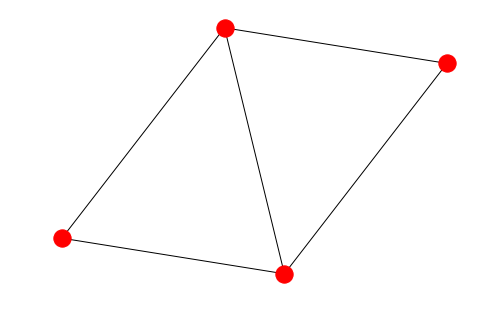

([2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 1., 0.]]),
 [(1.52+0j),
  (1+0j),
  (-0.5+1.32j),
  (-0.5-1.32j),
  1j,
  -1j,
  (-1+0j),
  (-0.76+0.86j),
  (-0.76-0.86j),
  (1+0j)])

In [124]:
# Test 1: K4
g = nx.Graph()
g.add_nodes_from([1,2,3,4])
g.add_edges_from([(1,2),(1,3),(1,4),(2,3),(3,4)])
nx.draw(g)
plt.show()
Ihara(g)

In [112]:
Leading_Eigenvalues(g,3)

[(1.52+0j), (-0.5-1.32j), (-0.5+1.32j)]

In [113]:
Characteristic_Polynomial_of_Directed_Graph(g)

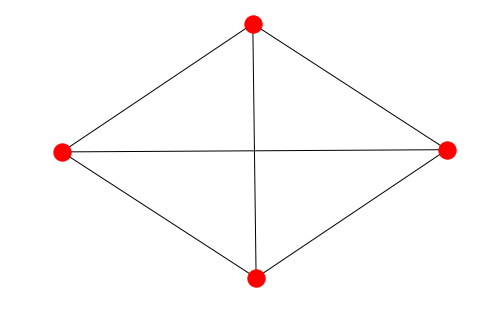

[[2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 array([[0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.],
        [0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.]]),
 [(-0.5+1.32j),
  (-0.5-1.32j),
  (2+0j),
  (-1+0j),
  (-1+0j),
  (-0.5+1.32j),
  (-0.5-1.32j),
  (-0.5+1.32j),
  (-0.5-1.32j),
  (1+0j),
  (1+0j),
  (1+0j)]]

In [114]:
# Test 2: Complete Graph
g = nx.complete_graph(4)
nx.draw(g)
plt.show()
list(Ihara(g))

In [116]:
Leading_Eigenvalues(g,3)

[(2+0j), (-0.5-1.32j), (-0.5+1.32j)]

In [117]:
Characteristic_Polynomial_of_Directed_Graph(g)

In [118]:
# Theorem: 
#  if a connected has no loops, no multi-edges, and no nodes with degree 1, 
#  then the singular values of directed graph matrix contain 
#  deg(i) - 1 for each node i and 2m-n 1's, 
#  where m is the number of edges n is the number of nodes 

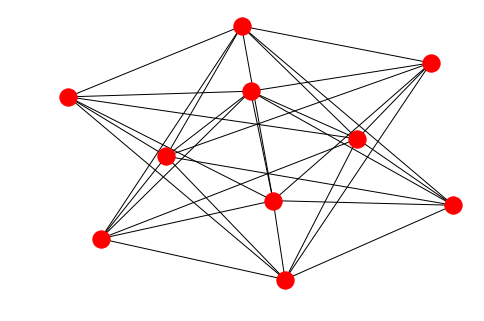

[[6.0,
  6.0,
  6.0,
  6.0,
  6.0,
  6.0,
  5.0,
  5.0,
  5.0,
  5.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 [(5.62+0j),
  (-1.5+1.94j),
  (-1.5-1.94j),
  (-1.81+1.44j),
  (-1.81-1.44j),
  (-0+2.24j),
  (-0-2.24j),
  (-0+2.45j),
  (-0-2.45j),
  2.24j,
  -2.24j,
  2.45j,
  -2.45j,
  (-0+2.45j),
  (-0-2.45j),
  (-0+2.45j),
  (-0-2.45j),
  2.24j,
  -2.24j,
  (-1+0j),
  (-1-0j),
  (-1+0j),
  (-1+0

In [119]:
# Test 3: Turan Graph
g = nx.turan_graph(10,3)
nx.draw(g)
plt.show()
list(Ihara(g))

In [120]:
Leading_Eigenvalues(g,5)

[(5.62+0j), (-0-2.45j), (-0+2.45j), (-0-2.45j), (-0+2.45j)]

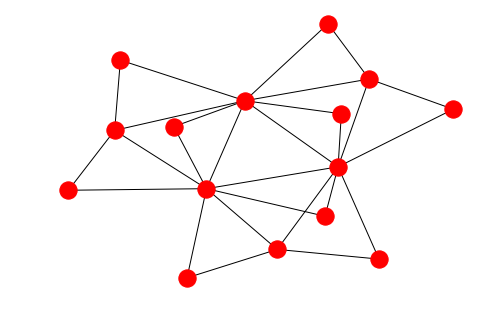

([7.0,
  7.0,
  7.0,
  3.0,
  3.0,
  3.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 [(3.32+0j),
  (-0.76+1.54j),
  (-0.76-1.54j),
  (-0.57+1.1j),
  (-0.57-1.1j),
  (0.17+1.17j),
  (0.17-1.17j),
  (-0.9+1.83j),
  (-0.9-1.83j),
  (-0.9+1.83j),
  (-0.9-1.83j),
  (0.87+1.18j),
  (0.87-1.18j),
  (0.87+1.18j),
  (0.87-1.18j),
  (-0.6+1.15j),
  (-0.6-1.15j),
  (-0.6+1.15j),
  (-0.6-1.15j),
  (0.13+1.18j),
  (0.13-1.18j),
  (0.13+1.18j),
  (0.13-1.18j),
  (-0

In [121]:
# Test 4: 
g = nx.dorogovtsev_goltsev_mendes_graph(3)
nx.draw(g)
plt.show()
Ihara(g)

In [122]:
Leading_Eigenvalues(g,10)

[(3.32+0j),
 (-0.9-1.83j),
 (-0.9+1.83j),
 (-0.9-1.83j),
 (-0.9+1.83j),
 (-0.76-1.54j),
 (-0.76+1.54j),
 (0.87-1.18j),
 (0.87+1.18j),
 (0.87-1.18j)]

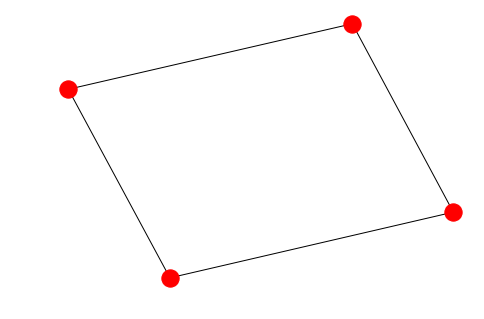

([2.56, 1.56, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0],
 array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 1., 1., 0., 0., 0., 0., 1., 0., 0.],
        [1., 0., 1., 0., 0., 0., 0., 1., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]]),
 [(0.34+1.31j),
  (0.34-1.31j),
  (1.4+0j),
  (1+0j),
  1j,
  -1j,
  (-1.04+0.69j),
  (-1.04-0.69j),
  (-1+0j),
  (-0+0j)])

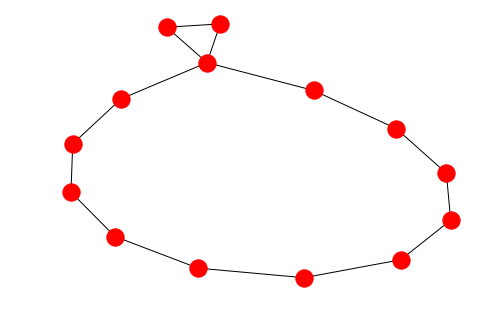

In [156]:
# Test 5: Multigraph
gg = nx.MultiGraph()
gg.add_edges_from([(0,1),(1,2),(2,3),(3,0),(0,0)])
nx.draw(gg)
plt.show()
nx.draw(Ihara_Multigraph(gg))
Ihara(gg)

In [154]:
Characteristic_Polynomial_of_Directed_Graph(Ihara_Multigraph(gg))

In [155]:
Leading_Eigenvalues(Ihara_Multigraph(gg),4)

[(1.18+0j), (-0.59-1.02j), (-0.59+1.02j), (1.01-0.41j)]